In [1]:
#Linear Regression - California Housing Dataset
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
# Load dataset and basic exploration
# Load dataset
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

In [4]:
# Basic exploration
print(df.head())
print(df.info())
print(df.describe())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population

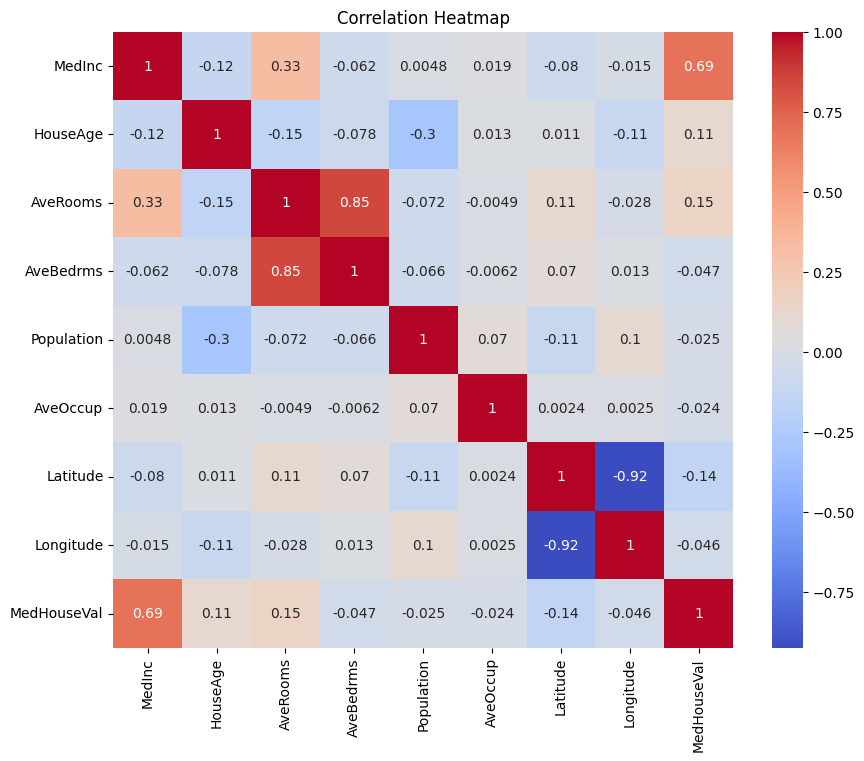

In [5]:
# Visualize features vs target
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

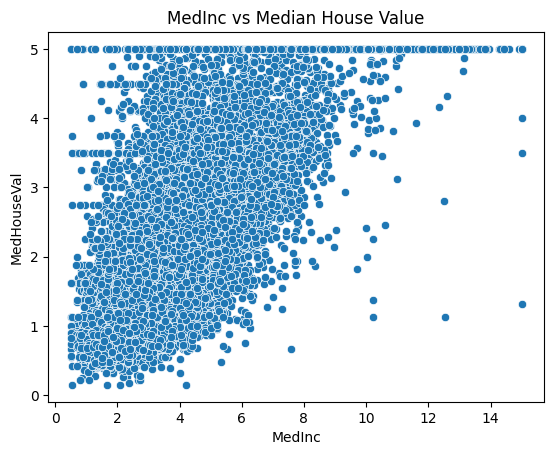

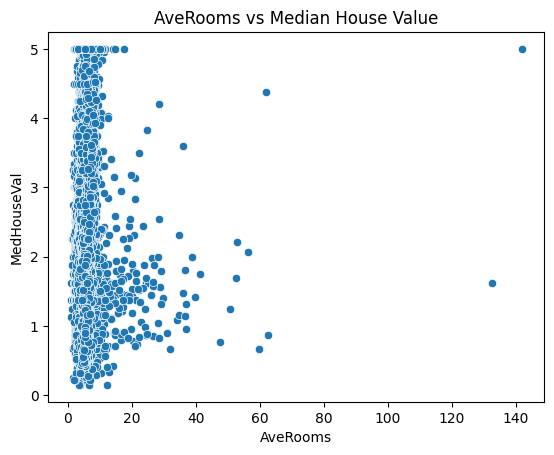

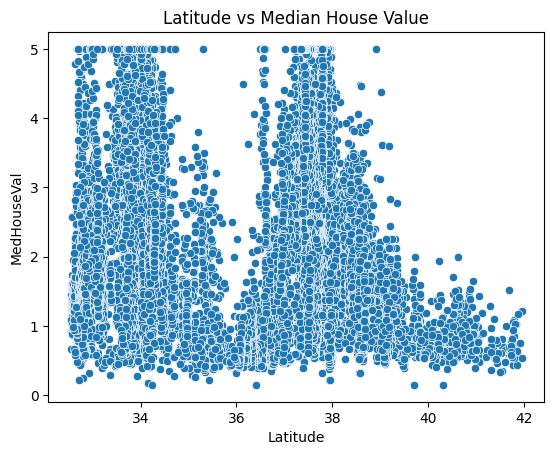

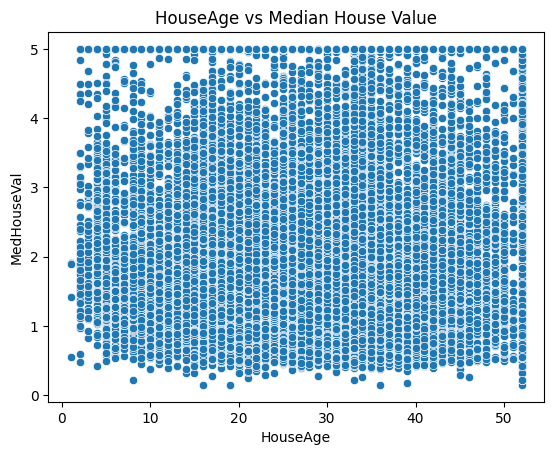

In [6]:
# Scatter plots for top features
top_corr_features = df.corr()['MedHouseVal'].abs().sort_values(ascending=False)[1:5]
for feature in top_corr_features.index:
    plt.figure()
    sns.scatterplot(data=df, x=feature, y='MedHouseVal')
    plt.title(f'{feature} vs Median House Value')
    plt.show()

In [7]:
# Train-Test Split & Linear Regression
# Split data
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [9]:
# Predictions
y_pred = lr.predict(X_test)

In [10]:
# Metrics
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Coefficients: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
Intercept: -37.02327770606409
R² Score: 0.5757877060324508
MAE: 0.5332001304956553
MSE: 0.5558915986952444
RMSE: 0.7455813830127764


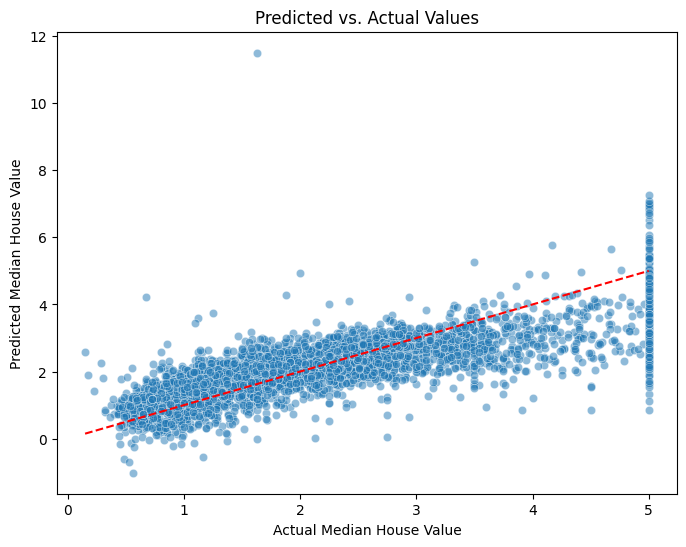

In [11]:
# Predicted vs Actual Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Predicted vs. Actual Values")
plt.show()


In [12]:
# Comment: The predicted values mostly align with the actual values, but there's visible variance. The R² score indicates moderate performance; more improvements (e.g., feature selection, scaling) are needed for better accuracy.

In [13]:
# Model Improvement (Feature Selection + Scaling)
# Use top 4 correlated features only
top_features = top_corr_features.index.tolist()
X_top = df[top_features]


In [14]:
# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_top)


In [15]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [16]:
# Train new model
lr_improved = LinearRegression()
lr_improved.fit(X_train, y_train)
y_pred_improved = lr_improved.predict(X_test)

In [17]:
# New metrics
print("\nImproved Model:")
print("R² Score:", r2_score(y_test, y_pred_improved))
print("MAE:", mean_absolute_error(y_test, y_pred_improved))
print("MSE:", mean_squared_error(y_test, y_pred_improved))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_improved)))


Improved Model:
R² Score: 0.5043169272470043
MAE: 0.5993913548627591
MSE: 0.6495475488975627
RMSE: 0.8059451277212133


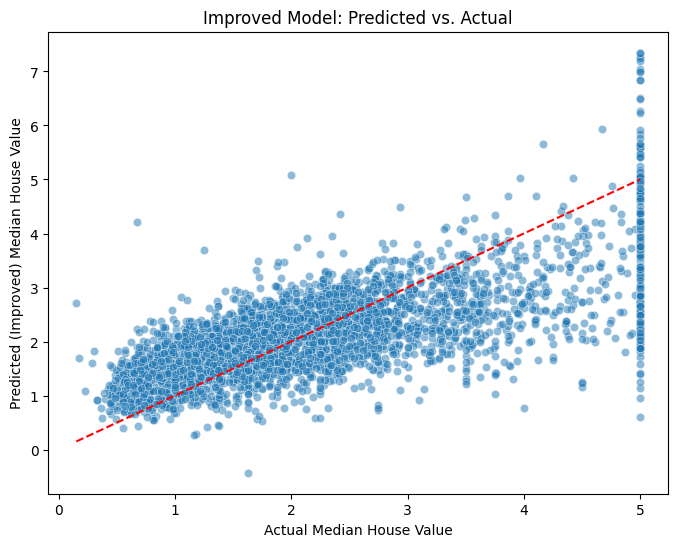

In [18]:
# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_improved, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted (Improved) Median House Value")
plt.title("Improved Model: Predicted vs. Actual")
plt.show()

In [19]:
# Comment: The improved model with selected features and standardization showed slightly better performance in terms of R² and error metrics. Feature selection and preprocessing significantly affect model quality.
